# covariance

In [28]:
import numpy as np
x=np.random.normal(size=1000)
esp=np.random.normal(0,3,size=1000)
y=5*x+esp
print(np.var(x))
np.cov(x,y)

0.9940556712676711


array([[ 0.99505072,  4.79716202],
       [ 4.79716202, 32.30156555]])

In [29]:
#on the diagonal we have var in the athors correlation

# correlation

In [31]:
np.corrcoef(x,y)

array([[1.        , 0.84615513],
       [0.84615513, 1.        ]])

if close to 1 it means x and y move in the same direction

In [32]:
import matplotlib.pyplot as plt

In [33]:
# example 1

Text(0.5, 0, 'x')

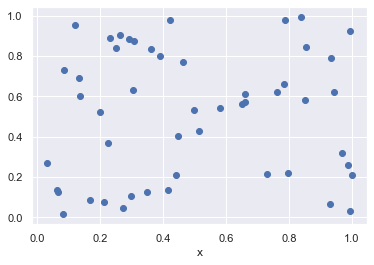

In [34]:
x=np.random.rand(50)
y=np.random.rand(50)
plt.scatter(x,y)
plt.xlabel('x')
plt.xlabel('x')

In [35]:
np.corrcoef(x,y)

array([[1.        , 0.06225702],
       [0.06225702, 1.        ]])

corrolation close to 0 -> no strong relation

In [36]:
# example 2

In [37]:
x=np.random.rand(50)
y=x+np.random.normal(0,0.1,50)
# y is x+ some noise with  standar deviation=0.1

array([[1.        , 0.95069306],
       [0.95069306, 1.        ]])

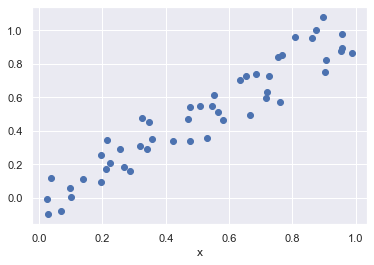

In [38]:
plt.scatter(x,y)
plt.xlabel('x')
plt.xlabel('x')
np.corrcoef(x,y)
#strong liner comovement betweet x and y

In [39]:
# example 3

array([[1.        , 0.69677911],
       [0.69677911, 1.        ]])

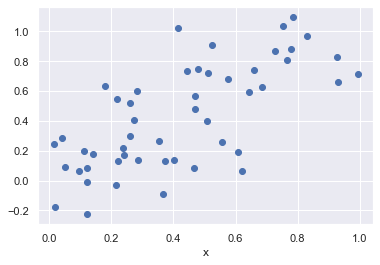

In [40]:
x=np.random.rand(50)
y=x+np.random.normal(0,0.3,50)
# y is x+ some noise with  standar deviation=0.3 -> we weaken the correlation
plt.scatter(x,y)
plt.xlabel('x')
plt.xlabel('x')
np.corrcoef(x,y)
#less strong linear comovement betweet x and y

In [41]:
# example 4

array([[ 1.        , -0.95204745],
       [-0.95204745,  1.        ]])

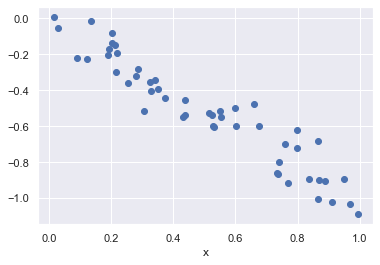

In [42]:
x=np.random.rand(50)
y=-x+np.random.normal(0,0.1,50)
# y is x+ some noise with  standar deviation=0.1 -> we weaken the correlation
plt.scatter(x,y)
plt.xlabel('x')
plt.xlabel('x')
np.corrcoef(x,y)
#less strong liner comovement betweet x and y
# strongly negative -> simutionously in opposite directions


# PCA

In [43]:
#example
seed=np.random.RandomState(1)
X=np.dot(seed.rand(2,2),seed.randn(2,200)).T

In [44]:
X.shape

(200, 2)

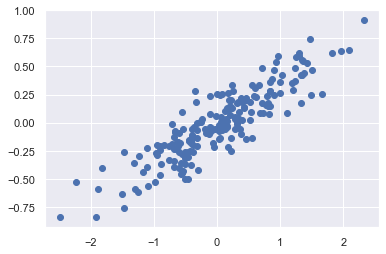

In [45]:
plt.scatter(X[:,0],X[:,1])

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca=PCA(n_components=1)

In [48]:
pca.fit(X)

PCA(n_components=1)

In [49]:
Xpca=pca.transform(X)

In [50]:
X.shape

(200, 2)

In [51]:
Xpca.shape

(200, 1)

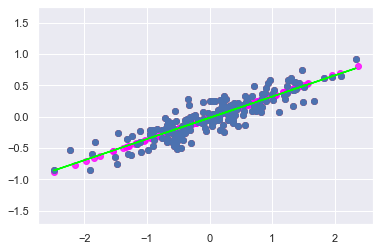

In [75]:
X_new=pca.inverse_transform(Xpca)
# plot original data
plt.scatter(X[:,0],X[:,1],alpha=0.8,color='red')
# plot first principal component
plt.scatter(X_new[:,0],X_new[:,1],alpha=0.8, color='fuchsia')
plt.axis('equal')

#Linear regression
from sklearn.linear_model import LinearRegression
a = X[:,0].reshape(-1, 1)  # values converts it into a numpy array
b = X[:,1].reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(a, b)  # perform linear regression
b_pred = linear_regressor.predict(a)  # make predictions
plt.scatter(a, b)
plt.plot(a, b_pred, color='lime')
plt.show()


the orange is the y1 wich has max variance
o8zrolha l orange houma l projection ta3 all the points 3al direction heki elli ta3ti l max variation

hna we try to maximize the variance
lineal regression you search to minimize the squared error

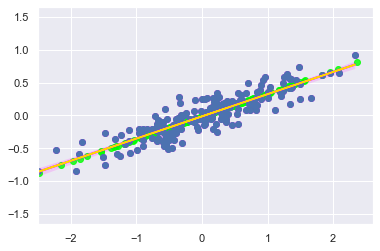

In [84]:
import seaborn as sns
sns.set()
%matplotlib inline
sns.regplot(X[:,0],X[:,1],color ='fuchsia')
plt.scatter(X_new[:,0],X_new[:,1], alpha=0.8,color ='lime')
plt.axis('equal')
from sklearn.linear_model import LinearRegression
a = X[:,0].reshape(-1, 1)  # values converts it into a numpy array
b = X[:,1].reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(a, b)  # perform linear regression
b_pred = linear_regressor.predict(a)  # make predictions
plt.scatter(a, b)
plt.plot(a, b_pred, color='gold')
plt.show()

## PCA dimension reduction use case

In [85]:
from sklearn.datasets import load_digits
digits=load_digits()

In [86]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [87]:
digits.data.shape

(1797, 64)

<Figure size 432x288 with 0 Axes>

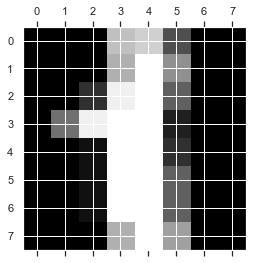

In [94]:
plt.gray()
plt.matshow(digits.images[1])

In [100]:
# define PCA to extract 2 principal components
pca = PCA(2)

In [102]:
PCs=pca.fit_transform(digits.data)
print(digits.data.shape)
print(PCs.shape)

(1797, 64)
(1797, 2)


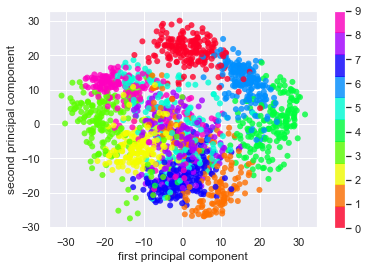

In [111]:
plt.scatter(PCs[:,0], PCs[:,1], c=digits.target, edgecolors='none',alpha=0.8,cmap=plt.cm.get_cmap('gist_rainbow',10))
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.colorbar()

In [112]:
pca.explained_variance_
#we see they have close variance

array([179.0069301 , 163.71774688])

princple goal is to reduce dimension so we can see data